In [1]:
from scipy.special import gamma, factorial
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
import sys
from scipy.signal import find_peaks

M=9.109e-31#kg
hbar=1.055e-34#m^2kg/s
rho_0=2e-10#m
E_0=1.6e-19#J

#nu_0=0.5,x<=30 function converge#
def F_1j_nu_0(nu_0,x):

    if(np.amax(x)>30):
        print('F_1j_nu_0 diverge!')
        sys.exit()
        
    sMax=100
    Error=1e-20

    amplitude=np.sqrt(2*nu_0*np.tanh(nu_0*np.pi*0.5)/np.pi)
    multiplication=1
    F_1j_nu_0=0
    for s in np.arange(0,sMax+1):
        multiplication=multiplication*(s**2+nu_0**2)
        phi_nu_0_s=np.angle(gamma(1+s+1j*nu_0))
        Sum=(-1)**s*np.cos(nu_0*np.log(x/2)-phi_nu_0_s)*(x**2/4)**(s)/np.math.factorial(s)/np.sqrt(multiplication)
        F_1j_nu_0=F_1j_nu_0+Sum
        if(np.amax(abs(Sum))<Error):
            break
    if(s==sMax):
        print("F_1j_nu_0 don't converge")
    F_1j_nu_0=amplitude*F_1j_nu_0
    return(F_1j_nu_0)

def G_1j_nu_0(nu_0,x):
    
    if(np.amax(x)>30):
        print('G_1j_nu_0 diverge!')
        sys.exit()
        
    sMax=100
    Error=1e-20

    amplitude=np.sqrt(2*nu_0/np.tanh(nu_0*np.pi*0.5)/np.pi)
    multiplication=1
    G_1j_nu_0=0
    for s in np.arange(0,sMax+1):
        multiplication=multiplication*(s**2+nu_0**2)
        phi_nu_0_s=np.angle(gamma(1+s+1j*nu_0))
        Sum=(-1)**s*np.sin(nu_0*np.log(x/2)-phi_nu_0_s)*(x**2/4)**(s)/np.math.factorial(s)/np.sqrt(multiplication)
        G_1j_nu_0=G_1j_nu_0+Sum
        if(np.amax(abs(Sum))<Error):
            break
    if(s==sMax):
        print("G_1j_nu_0 don't converge")
    G_1j_nu_0=amplitude*G_1j_nu_0
    return(G_1j_nu_0)

def K_1j_nu_0(nu_0,x):
    
    if(np.amax(x)>30):
        print('K_1j_nu_0 diverge!')
        sys.exit()
        
    sMax=100
    Error=1e-20

    amplitude=-np.sqrt(nu_0*np.pi/np.sinh(nu_0*np.pi))
    multiplication=1
    K_1j_nu_0=0
    for s in np.arange(0,sMax+1):
        multiplication=multiplication*(s**2+nu_0**2)
        phi_nu_0_s=np.angle(gamma(1+s+1j*nu_0))
        Sum=np.sin(nu_0*np.log(x/2)-phi_nu_0_s)*(x**2/4)**(s)/np.math.factorial(s)/np.sqrt(multiplication)
        K_1j_nu_0=K_1j_nu_0+Sum
        if(np.amax(abs(Sum))<Error):
            break
    if(s==sMax):
        print("K_1j_nu_0 don't converge")
    K_1j_nu_0=amplitude*K_1j_nu_0
    return K_1j_nu_0

def DF_1j_nu_0(nu_0,x):
    
    if(np.amax(x)>30):
        print('DF_1j_nu_0 diverge!')
        sys.exit()
        
    sMax=100
    Error=1e-20

    amplitude=np.sqrt(2*nu_0*np.tanh(nu_0*np.pi*0.5)/np.pi)
    multiplication=1
    DF_1j_nu_0=0
    for s in np.arange(0,sMax+1):
        multiplication=multiplication*(s**2+nu_0**2)
        phi_nu_0_s=np.angle(gamma(1+s+1j*nu_0))
        derivative=-nu_0/2*np.sin(nu_0*np.log(x/2)-phi_nu_0_s)+s*np.cos(nu_0*np.log(x/2)-phi_nu_0_s)
        Sum=(-1)**s*(x**2/4)**(s)/np.math.factorial(s)/np.sqrt(multiplication)*2/x*derivative
        DF_1j_nu_0=DF_1j_nu_0+Sum
        if(np.amax(abs(Sum))<Error):
            break
    if(s==sMax):
        print("DF_1j_nu_0 don't converge")
    DF_1j_nu_0=amplitude*DF_1j_nu_0  
    return(DF_1j_nu_0)

def DG_1j_nu_0(nu_0,x):
    
    if(np.amax(x)>30):
        print('DG_1j_nu_0 diverge!')
        sys.exit()
        
    sMax=100
    Error=1e-20

    amplitude=np.sqrt(2*nu_0/np.tanh(nu_0*np.pi*0.5)/np.pi)
    multiplication=1
    DG_1j_nu_0=0
    for s in np.arange(0,sMax+1):
        multiplication=multiplication*(s**2+nu_0**2)
        phi_nu_0_s=np.angle(gamma(1+s+1j*nu_0))
        derivative=nu_0/2*np.cos(nu_0*np.log(x/2)-phi_nu_0_s)+s*np.sin(nu_0*np.log(x/2)-phi_nu_0_s)
        Sum=(-1)**s*(x**2/4)**(s)/np.math.factorial(s)/np.sqrt(multiplication)*2/x*derivative
        DG_1j_nu_0=DG_1j_nu_0+Sum
        if(np.amax(abs(Sum))<Error):
            break
    if(s==sMax):
        print("DG_1j_nu_0 don't converge")
    DG_1j_nu_0=amplitude*DG_1j_nu_0
    return(DG_1j_nu_0)

def DK_1j_nu_0(nu_0,x):

    if(np.amax(x)>30):
        print('DK_1j_nu_0 diverge!')
        sys.exit()
        
    sMax=100
    Error=1e-20

    amplitude=-np.sqrt(nu_0*np.pi/np.sinh(nu_0*np.pi))
    multiplication=1
    DK_1j_nu_0=0
    for s in np.arange(0,sMax+1):
        multiplication=multiplication*(s**2+nu_0**2)
        phi_nu_0_s=np.angle(gamma(1+s+1j*nu_0))
        derivative=nu_0/2*np.cos(nu_0*np.log(x/2)-phi_nu_0_s)+s*np.sin(nu_0*np.log(x/2)-phi_nu_0_s)
        Sum=(x**2/4)**(s)/np.math.factorial(s)/np.sqrt(multiplication)*2/x*derivative
        DK_1j_nu_0=DK_1j_nu_0+Sum
        if(np.amax(abs(Sum))<Error):
            break
    if(s==sMax):
        print("DK_1j_nu_0 don't converge")
    DK_1j_nu_0=amplitude*DK_1j_nu_0
    return(DK_1j_nu_0)

def find_bound_state_energy_function(EE):
    Num_E=np.size(EE)
    find_bound_state_energy_function=np.zeros(Num_E)
    for i in np.arange(0,Num_E):
        E=EE[i]
        tilde_alpha=np.sqrt(1-np.sin(alpha)**2)*0.5/np.sin(alpha)
        if(-1-hbar**2*tilde_alpha**2/(2*M*E*rho_0**2)>0):
            factor=np.sqrt(-1-hbar**2*tilde_alpha**2/(2*M*E*rho_0**2))
            x_1=np.sqrt(-2*M*E)*rho_0/hbar
            x_2=np.sqrt(2*M*E*rho_0**2/hbar**2+tilde_alpha**2)
            find_bound_state_energy_function[i]=DK_1j_nu_0(tilde_alpha,x_1)/K_1j_nu_0(tilde_alpha,x_1)-factor*special.jvp(0,x_2)/special.jv(0,x_2)
        else:
            factor=np.sqrt(1+hbar**2*tilde_alpha**2/(2*M*E*rho_0**2))
            x_1=np.sqrt(-2*M*E)*rho_0/hbar
            x_3=np.sqrt(-2*M*E*rho_0**2/hbar**2-tilde_alpha**2)
            find_bound_state_energy_function[i]=DK_1j_nu_0(tilde_alpha,x_1)/K_1j_nu_0(tilde_alpha,x_1)-factor*special.ivp(0,x_3)/special.iv(0,x_3)

    return find_bound_state_energy_function

def A(E,rho_0,alpha):
    tilde_alpha=np.sqrt(1-np.sin(alpha)**2)*0.5/np.sin(alpha)
    x_1=np.sqrt(2*M*E)/hbar*rho_0
    x_2=np.sqrt(2*M*E*rho_0**2/hbar**2+tilde_alpha**2)
    factor=np.sqrt(1+hbar**2*tilde_alpha**2/(2*M*E*rho_0**2))
    A1=DG_1j_nu_0(tilde_alpha,x_1)*special.jn(0,x_2)+factor*special.jn(1,x_2)*G_1j_nu_0(tilde_alpha,x_1)
    A2=F_1j_nu_0(tilde_alpha,x_1)*DG_1j_nu_0(tilde_alpha,x_1)-DF_1j_nu_0(tilde_alpha,x_1)*G_1j_nu_0(tilde_alpha,x_1)
    A=A1/A2
    return A

def B(E,rho_0,alpha):
    tilde_alpha=np.sqrt(1-np.sin(alpha)**2)*0.5/np.sin(alpha)
    x_1=np.sqrt(2*M*E)/hbar*rho_0
    x_2=np.sqrt(2*M*E*rho_0**2/hbar**2+tilde_alpha**2)
    factor=np.sqrt(1+hbar**2*tilde_alpha**2/(2*M*E*rho_0**2))
    B1=DF_1j_nu_0(tilde_alpha,x_1)*special.jn(0,x_2)+factor*special.jn(1,x_2)*F_1j_nu_0(tilde_alpha,x_1)
    B2=F_1j_nu_0(tilde_alpha,x_1)*DG_1j_nu_0(tilde_alpha,x_1)-DF_1j_nu_0(tilde_alpha,x_1)*G_1j_nu_0(tilde_alpha,x_1)
    B=-B1/B2
    return B

def C(E,rho_0,alpha):
    tilde_alpha=np.sqrt(1-np.sin(alpha)**2)*0.5/np.sin(alpha)
    x_1=np.sqrt(-2*M*E)*rho_0/hbar
    x_2=np.sqrt(2*M*E*rho_0**2/hbar**2+tilde_alpha**2)
    x_3=np.sqrt(-2*M*E*rho_0**2/hbar**2+tilde_alpha**2)
    if(tilde_alpha**2/rho_0**2>-2*M*E/hbar**2):
        C=special.jv(0,x_2)/K_1j_nu_0(tilde_alpha,x_1)
    else:
        C=special.iv(0,x_3)/K_1j_nu_0(tilde_alpha,x_1)    
        
    return C

def D(E,rho_0,alpha,l):
    tilde_nu=np.sqrt(l**2/np.sin(alpha)**2-(1-np.sin(alpha)**2)/(4*np.sin(alpha)**2))
    if(tilde_nu**2/rho_0**2>2*M*E/hbar**2):
        factor=np.sqrt(hbar**2*tilde_nu**2/(2*M*E*rho_0**2)-1)
        x_1=np.sqrt(2*M*E)*rho_0/hbar
        x_2=np.sqrt(-2*M*E*rho_0**2/hbar**2+tilde_nu**2)
        D1=special.iv(0,x_2)*(special.yv(tilde_nu-1,x_1)-special.yv(tilde_nu+1,x_1))+2*factor*special.iv(1,x_2)*special.yv(tilde_nu,x_1)
        D2=special.jv(tilde_nu,x_1)*(special.yv(tilde_nu-1,x_1)-special.yv(tilde_nu+1,x_1))-special.yv(tilde_nu,x_1)*(special.jv(tilde_nu-1,x_1)-special.jv(tilde_nu+1,x_1))
        D=D1/D2
    else:
        factor=np.sqrt(1-hbar**2*tilde_nu**2/(2*M*E*rho_0**2))
        x_1=np.sqrt(2*M*E)*rho_0/hbar
        x_2=np.sqrt(2*M*E*rho_0**2/hbar**2-tilde_nu**2)
        D1=special.jv(0,x_2)*(special.yv(tilde_nu-1,x_1)-special.yv(tilde_nu+1,x_1))+2*factor*special.jv(1,x_2)*special.yv(tilde_nu,x_1)
        D2=special.jv(tilde_nu,x_1)*(special.yv(tilde_nu-1,x_1)-special.yv(tilde_nu+1,x_1))-special.yv(tilde_nu,x_1)*(special.jv(tilde_nu-1,x_1)-special.jv(tilde_nu+1,x_1))
        D=D1/D2

    return D

def L(E,rho_0,alpha,l):
    tilde_nu=np.sqrt(l**2/np.sin(alpha)**2-(1-np.sin(alpha)**2)/(4*np.sin(alpha)**2))
    if(tilde_nu**2/rho_0**2>2*M*E/hbar**2):
        factor=np.sqrt(hbar**2*tilde_nu**2/(2*M*E*rho_0**2)-1)
        x_1=np.sqrt(2*M*E)*rho_0/hbar
        x_2=np.sqrt(-2*M*E*rho_0**2/hbar**2+tilde_nu**2)
        L1=special.iv(0,x_2)*(special.jv(tilde_nu-1,x_1)-special.jv(tilde_nu+1,x_1))+2*factor*special.iv(1,x_2)*special.jv(tilde_nu,x_1)
        L2=special.jv(tilde_nu,x_1)*(special.yv(tilde_nu-1,x_1)-special.yv(tilde_nu+1,x_1))-special.yv(tilde_nu,x_1)*(special.jv(tilde_nu-1,x_1)-special.jv(tilde_nu+1,x_1))
        L=-L1/L2
    else:
        factor=np.sqrt(1-hbar**2*tilde_nu**2/(2*M*E*rho_0**2))
        x_1=np.sqrt(2*M*E)*rho_0/hbar
        x_2=np.sqrt(2*M*E*rho_0**2/hbar**2-tilde_nu**2)
        L1=special.jv(0,x_2)*(special.jv(tilde_nu-1,x_1)-special.jv(tilde_nu+1,x_1))+2*factor*special.jv(1,x_2)*special.jv(tilde_nu,x_1)
        L2=special.jv(tilde_nu,x_1)*(special.yv(tilde_nu-1,x_1)-special.yv(tilde_nu+1,x_1))-special.yv(tilde_nu,x_1)*(special.jv(tilde_nu-1,x_1)-special.jv(tilde_nu+1,x_1))
        L=-L1/L2
    return L

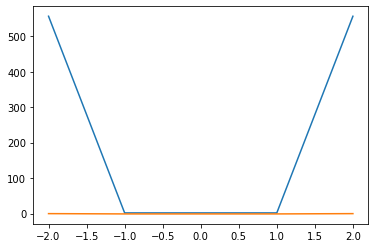

In [3]:
rho=5*rho_0
E=E_0#np.exp(np.arange(-20,1,0.01))

alpha=np.pi/2*0.3
LL=np.array([-2,-1,1,2])
Num_L=np.size(LL)
DD=np.zeros(Num_L)
LLL=np.zeros(Num_L)
for i in np.arange(0,Num_L):
    l=LL[i]
    DD[i]=D(E,rho_0,alpha,l)
    LLL[i]=L(E,rho_0,alpha,l)

plt.plot(LL,DD)
plt.plot(LL,LLL)
# tilde_nu=np.sqrt(l**2/np.sin(alpha)**2-(1-np.sin(alpha)**2)/(4*np.sin(alpha)**2))
# x_1=np.sqrt(2*M*E)*rho/hbar

#np.sqrt(D(E,rho_0,alpha,l)**2+L(E,rho_0,alpha,l)**2)
#R3=(D(E,rho_0,alpha,l)*special.jv(tilde_nu,x_1)+L(E,rho_0,alpha,l)*special.yv(tilde_nu,x_1))/np.sqrt(D(E,rho_0,alpha,l)**2+L(E,rho_0,alpha,l)**2)

In [4]:
special.jv(np.array([0,1]),1)

array([0.76519769, 0.44005059])

In [2]:
Rho=[5*rho_0,10*rho_0]
EE=np.arange(0.1,10,0.01)*1e-19#np.exp(np.arange(-20,1,0.01))

alpha=np.pi/2*0.3
ll=np.arange(-50,50,1)

Num_E=np.size(EE)
Num_l=np.size(ll)
Num_rho=np.size(Rho)
LDOS=np.zeros((Num_rho,Num_E))
X_1=np.zeros(Num_E)
LDOS_3=np.ones(Num_E)
tilde_alpha=np.sqrt(1-np.sin(alpha)**2)*0.5/np.sin(alpha)
for k in np.arange(0,Num_rho):
    rho=Rho[k]
    for i in np.arange(0,Num_E):
        E=EE[i]
        X_1[i]=np.sqrt(2*M*E)*rho/hbar
        x_1=X_1[i]
        x_2=np.sqrt(2*M*E)*rho_0/hbar
        for j in np.arange(0,Num_l):
            l=ll[j]
            if l==0:
               a=1
            else:
                tilde_nu=np.sqrt(l**2/np.sin(alpha)**2-(1-np.sin(alpha)**2)/(4*np.sin(alpha)**2))
                LDOS[k,i]=LDOS[k,i]+((D(E,rho_0,alpha,l)*special.jv(tilde_nu,x_1)+L(E,rho_0,alpha,l)*special.yv(tilde_nu,x_1))/np.sqrt(D(E,rho_0,alpha,l)**2+L(E,rho_0,alpha,l)**2))**2
           
    
EEE=EE*1e19
fig = plt.figure()
fig.set_size_inches(8, 6)

plt.plot(EEE,LDOS[0,:],'k',label=r'$\rho=5\rho_0$')
plt.plot(EEE,LDOS[1,:],'tab:red',label=r'$\rho=10\rho_0$')
plt.plot(EEE,LDOS_3,color='k', linestyle='dashed',label='Free')
plt.xlabel(r'$E/(eV)$',fontsize=20)
plt.ylabel(r'$N(E,\rho)$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim([0.15,1.15])
plt.xlim([0,10])

# plt.text(0.6, 0.01,r'$\alpha=\frac{\pi}{2}\times0.3$',
#         verticalalignment='bottom', horizontalalignment='right',
#         transform=plt.transAxes,
#         color='tab:blue', fontsize=16)
plt.text(0.7, 0.5, r'$\alpha=\frac{\pi}{2}\times0.9$', fontsize=21)
plt.legend(fontsize=24,loc=[0.45,0.2], edgecolor='k',fancybox=False)
plt.tick_params(axis="y",direction="in", pad=8)
plt.tick_params(axis="x",direction="in", pad=8)
plt.tick_params(top='on',bottom='on',left='on',right='on')
plt.savefig('Fig2-b.pdf')
#plt.xscale('log')

<ipython-input-1-a0a36d62e002>:213: RuntimeWarning: invalid value encountered in double_scalars
  D1=special.iv(0,x_2)*(special.yv(tilde_nu-1,x_1)-special.yv(tilde_nu+1,x_1))+2*factor*special.iv(1,x_2)*special.yv(tilde_nu,x_1)
<ipython-input-1-a0a36d62e002>:214: RuntimeWarning: invalid value encountered in double_scalars
  D2=special.jv(tilde_nu,x_1)*(special.yv(tilde_nu-1,x_1)-special.yv(tilde_nu+1,x_1))-special.yv(tilde_nu,x_1)*(special.jv(tilde_nu-1,x_1)-special.jv(tilde_nu+1,x_1))
<ipython-input-1-a0a36d62e002>:233: RuntimeWarning: invalid value encountered in double_scalars
  L2=special.jv(tilde_nu,x_1)*(special.yv(tilde_nu-1,x_1)-special.yv(tilde_nu+1,x_1))-special.yv(tilde_nu,x_1)*(special.jv(tilde_nu-1,x_1)-special.jv(tilde_nu+1,x_1))
<ipython-input-1-a0a36d62e002>:213: RuntimeWarning: overflow encountered in double_scalars
  D1=special.iv(0,x_2)*(special.yv(tilde_nu-1,x_1)-special.yv(tilde_nu+1,x_1))+2*factor*special.iv(1,x_2)*special.yv(tilde_nu,x_1)
<ipython-input-2-cd64d86f

KeyboardInterrupt: 